In [ ]:
!pip install opencv-python
!pip install tensorflow==2.6.0
!pip install tensorflow --upgrade --user
!pip install pip --upgrade --user

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 458.4/458.4 MB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 18.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.9/14.9 MB 82.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 KB 6.6 MB/s eta 0:00:00
  Created wheel for clang: filename=clang-5.0-py3-none-any.whl size=30694 sha256=43a0ea6541704fe3449ae7660134f9ad67e8f5644ad49bb6097775cd11b314b0
  Stored in directory: /root/.cache/pip/wheels/3a/ce/7a/27094f689461801c934296d07078773603663dfcaca63bb064
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4849 sha256=327c963542afb

In [ ]:
#importing libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,models
import matplotlib.pyplot as plt
import cv2
import os
import PIL
import numpy as np
import pathlib
import glob

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#assigning directory
directory=pathlib.Path("/content/drive/MyDrive/DATA")

In [ ]:
# Just needed in case you'd like to append it to an array
data = []

for filename in os.listdir("."):
    if filename.endswith("png"): 
        # Your code comes here such as 
        print(filename)
        data.append(filename)

In [ ]:
#count of images in the directory given
image_count=len(list(directory.glob('*/*.png')))
#print(list(directory.glob('/*.jpg')))
image_count

514

In [ ]:
#creating dictionary of flower species
socialdistance_images_dict={
    "WithSocialDistance":list(directory.glob('with_social_distancing/*.png')),
    "WithoutSocialDistance":list(directory.glob('without_social_distance/*.png')),
}

In [ ]:
socialdistance_images_dict

{'WithSocialDistance': [PosixPath('/content/drive/MyDrive/DATA/with_social_distancing/38.png'),
  PosixPath('/content/drive/MyDrive/DATA/with_social_distancing/37.png'),
  PosixPath('/content/drive/MyDrive/DATA/with_social_distancing/39.png'),
  PosixPath('/content/drive/MyDrive/DATA/with_social_distancing/40.png'),
  PosixPath('/content/drive/MyDrive/DATA/with_social_distancing/42.png'),
  PosixPath('/content/drive/MyDrive/DATA/with_social_distancing/25.png'),
  PosixPath('/content/drive/MyDrive/DATA/with_social_distancing/35.png'),
  PosixPath('/content/drive/MyDrive/DATA/with_social_distancing/32.png'),
  PosixPath('/content/drive/MyDrive/DATA/with_social_distancing/30.png'),
  PosixPath('/content/drive/MyDrive/DATA/with_social_distancing/41.png'),
  PosixPath('/content/drive/MyDrive/DATA/with_social_distancing/26.png'),
  PosixPath('/content/drive/MyDrive/DATA/with_social_distancing/31.png'),
  PosixPath('/content/drive/MyDrive/DATA/with_social_distancing/24.png'),
  PosixPath('/co

In [ ]:
#Different species list
keys=["WithSocialDistance", "WithoutSocialDistance"]

In [ ]:
#resizing and creating labels using computer vision
resized,labels=[],[]
for flower_name,images in socialdistance_images_dict.items():
    for image in images:
        print("completed")
        img=cv2.imread(str(image))
        resized_image=cv2.resize(img,(224,224))
        resized.append(resized_image)
        labels.append(keys.index(flower_name))
socialdistance_images_dict

completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed


{'WithSocialDistance': [PosixPath('/content/drive/MyDrive/DATA/with_social_distancing/38.png'),
  PosixPath('/content/drive/MyDrive/DATA/with_social_distancing/37.png'),
  PosixPath('/content/drive/MyDrive/DATA/with_social_distancing/39.png'),
  PosixPath('/content/drive/MyDrive/DATA/with_social_distancing/40.png'),
  PosixPath('/content/drive/MyDrive/DATA/with_social_distancing/42.png'),
  PosixPath('/content/drive/MyDrive/DATA/with_social_distancing/25.png'),
  PosixPath('/content/drive/MyDrive/DATA/with_social_distancing/35.png'),
  PosixPath('/content/drive/MyDrive/DATA/with_social_distancing/32.png'),
  PosixPath('/content/drive/MyDrive/DATA/with_social_distancing/30.png'),
  PosixPath('/content/drive/MyDrive/DATA/with_social_distancing/41.png'),
  PosixPath('/content/drive/MyDrive/DATA/with_social_distancing/26.png'),
  PosixPath('/content/drive/MyDrive/DATA/with_social_distancing/31.png'),
  PosixPath('/content/drive/MyDrive/DATA/with_social_distancing/24.png'),
  PosixPath('/co

In [ ]:
#function to print images
def print_image(i,j):
    plt.imshow(i)
    plt.title(keys[j])

In [ ]:
#splitting data into train and test
#if any integer is given to random_state it will generate and give same set of data each time we run the code and if we give 
#None different sequences will be generated
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(resized,labels,test_size=0.25,random_state=0)

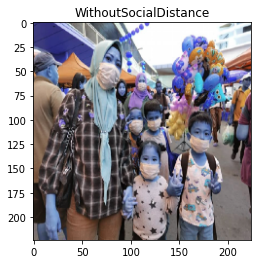

In [ ]:
print_image(x_train[15],y_train[15])

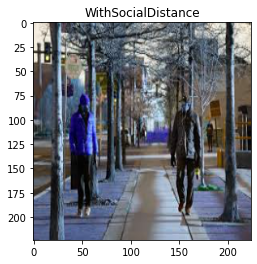

In [ ]:
print_image(x_test[6],y_test[6])

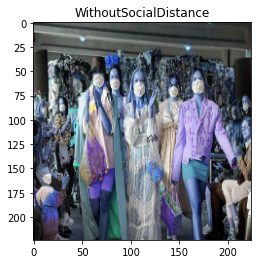

In [ ]:
print_image(x_test[20],y_test[20])

In [ ]:
#normalizing data
x_train_scaled=np.array(x_train)/255
x_test_scaled=np.array(x_test)/255

In [ ]:
x_train_scaled.shape

(385, 224, 224, 3)

In [ ]:
y_train=np.array(y_train)
y_train.shape

(385,)

In [ ]:
!pip install visualkeras
import visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 992.0/992.0 KB 35.2 MB/s eta 0:00:00


#CNN Model With Data Augumentation layers and Dropout layers

In [ ]:
model1=models.Sequential([
    layers.experimental.preprocessing.RandomZoom(0.3),
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation="relu"),
    layers.Dropout(0.25),
    layers.Dense(64,activation="relu"),
    layers.Dropout(0.2),
    layers.Dense(2,activation="softmax")
    #layers.Dense(2,kernel_regularizer=l2(0.01),activation="softmax")
])
model1.compile(
optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [ ]:
import tensorflow as tf
class myCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        print("call")
        if(logs.get('accuracy') > .99):   
            print("\nReached %2.2f%% accuracy, so stopping training!!" %(99))   
            self.model.stop_training = True
callbacks = myCallback()

In [ ]:
model1.fit(x_train_scaled,np.array(y_train),epochs=100, callbacks = [callbacks])

Epoch 1/100


13/13 [==============================] - 6s 85ms/step - loss: 1.0785 - accuracy: 0.6130
Epoch 2/100
13/13 [==============================] - 1s 82ms/step - loss: 0.6155 - accuracy: 0.6442
Epoch 3/100
13/13 [==============================] - 1s 80ms/step - loss: 0.5106 - accuracy: 0.7506
Epoch 4/100
13/13 [==============================] - 1s 82ms/step - loss: 0.4211 - accuracy: 0.8338
Epoch 5/100
13/13 [==============================] - 1s 80ms/step - loss: 0.4028 - accuracy: 0.8338
Epoch 6/100
13/13 [==============================] - 1s 84ms/step - loss: 0.4260 - accuracy: 0.8104
Epoch 7/100
13/13 [==============================] - 1s 113ms/step - loss: 0.3761 - accuracy: 0.8390
Epoch 8/100
13/13 [==============================] - 2s 132ms/step - loss: 0.3156 - accuracy: 0.8571
Epoch 9/100
13/13 [==============================] - 2s 121ms/step - loss: 0.3142 - accuracy: 0.8675
Epoch 10/100
13/13 [==============================] - 2s 122ms/step - loss: 0.4661 - accuracy: 0.7740
Epoch 1

In [ ]:
model1.evaluate(x_test_scaled,np.array(y_test))

5/5 [==============================] - 0s 18ms/step - loss: 0.2925 - accuracy: 0.8992


[0.29252365231513977, 0.8992248177528381]

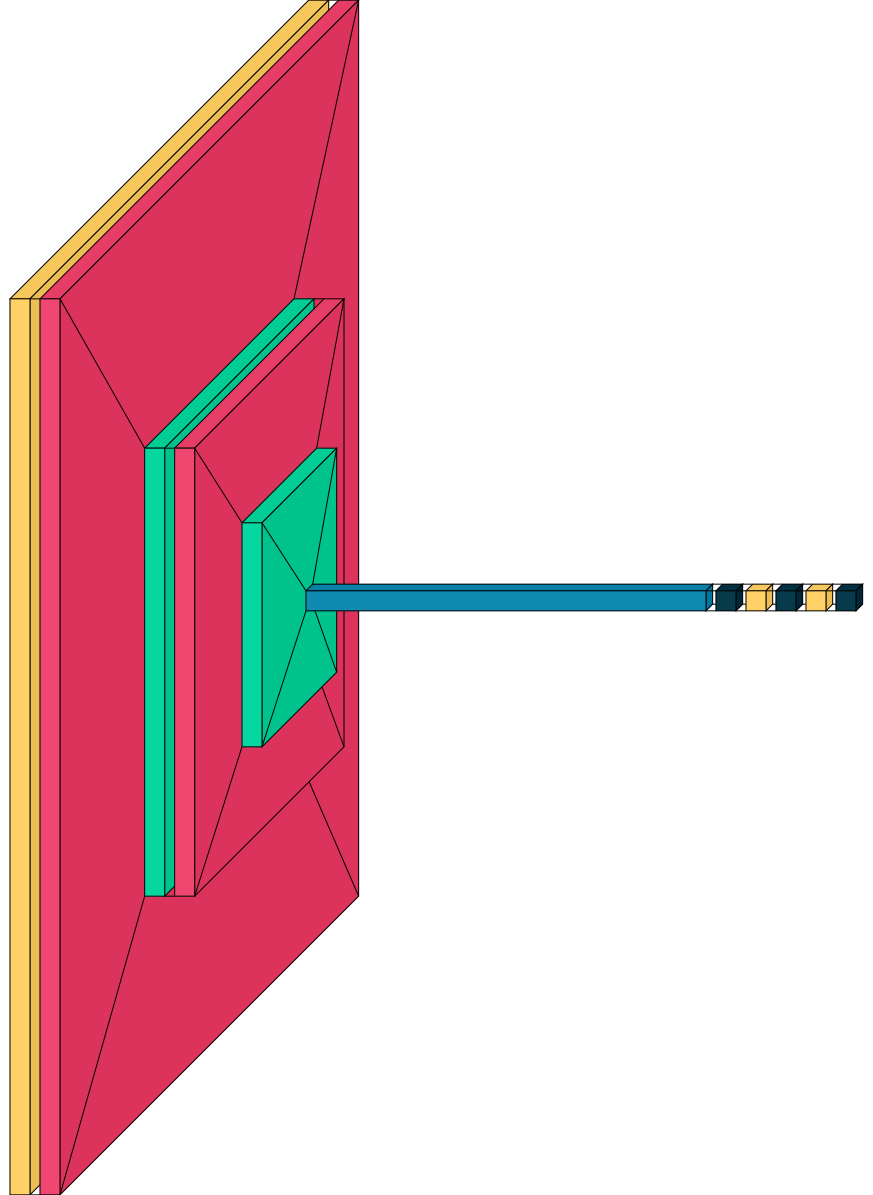

In [ ]:
visualkeras.layered_view(model1)